In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim

In [37]:
train_stat = pd.read_csv('./sep_data/train_scaled_stat_feat_df.csv')
dev_stat = pd.read_csv('./sep_data/dev_scaled_stat_feat_df.csv')

train_stat = train_stat.fillna(train_stat.mean())
dev_stat = dev_stat.fillna(dev_stat.mean())
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1579 non-null   int64  
 1   reply_contributors                   1579 non-null   float64
 2   reply_possibly_sensitive             1579 non-null   float64
 3   reply_possibly_sensitive_appealable  1579 non-null   float64
 4   reply_retweet_count                  1579 non-null   float64
 5   reply_favorite_count                 1579 non-null   float64
 6   reply_mentioned_url_num              1579 non-null   float64
 7   reply_id_num                         1579 non-null   float64
 8   reply_followers_count                1579 non-null   float64
 9   reply_friends_count                  1579 non-null   float64
 10  reply_listed_count                   1579 non-null   float64
 11  reply_favourites_count        

In [38]:
train_stat.drop(columns=['Unnamed: 0', 'contributors'], inplace=True)
train_stat.head()

,reply_contributors,reply_possibly_sensitive,reply_possibly_sensitive_appealable,reply_retweet_count,reply_favorite_count,reply_mentioned_url_num,reply_id_num,reply_followers_count,reply_friends_count,reply_listed_count,...,reply_count,contributors_enabled.1,is_translator,is_translation_enabled,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications
0,0.0,4.178398e-17,0.0,7.466035e-17,3.904607e-17,4.813118e-17,-2.693797e-17,2.517366e-17,2.513063e-17,7.701634e-17,...,-0.504152,0.0,0.0,-0.365410,-0.722953,1.392986,-0.050395,0.0,0.0,0.0
1,0.0,-1.533986e-01,0.0,-5.106740e-02,-4.153092e-02,-3.204961e-01,-2.766346e-01,-1.180378e-01,-1.121073e-02,-1.126588e-01,...,-0.297330,0.0,0.0,2.736649,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0
2,0.0,4.178398e-17,0.0,7.466035e-17,3.904607e-17,4.813118e-17,-2.693797e-17,2.517366e-17,2.513063e-17,7.701634e-17,...,-0.504152,0.0,0.0,-0.365410,1.383215,1.392986,-0.050395,0.0,0.0,0.0
3,0.0,-1.533986e-01,0.0,-5.094274e-02,-4.153092e-02,-3.204961e-01,-3.995551e-01,-1.282902e-01,-3.318359e-01,-1.485160e-01,...,-0.452447,0.0,0.0,-0.365410,1.383215,1.392986,-0.050395,0.0,0.0,0.0
4,0.0,-1.533986e-01,0.0,-4.907282e-02,-4.127419e-02,-3.934518e-01,5.018618e-01,-1.202372e-01,1.765633e+00,-8.165513e-02,...,0.840188,0.0,0.0,-0.365410,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0


In [39]:
dev_stat.drop(columns=['Unnamed: 0', 'contributors'], inplace=True)
dev_stat.head()

,reply_contributors,reply_possibly_sensitive,reply_possibly_sensitive_appealable,reply_retweet_count,reply_favorite_count,reply_mentioned_url_num,reply_id_num,reply_followers_count,reply_friends_count,reply_listed_count,...,reply_count,contributors_enabled.1,is_translator,is_translation_enabled,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications
0,0.0,-0.153399,0.0,-0.051067,-0.041531,-0.466408,-0.317608,-0.129459,-0.407111,-0.148813,...,-0.452447,0.0,0.0,-0.36541,1.383215,-0.717882,-0.050395,0.0,0.0,0.0
1,0.0,-0.153399,0.0,-0.050943,-0.041531,-0.393452,-0.317608,-0.129921,-0.444119,-0.147129,...,-0.400741,0.0,0.0,-0.36541,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0
2,0.0,-0.153399,0.0,-0.045956,-0.040761,-0.247540,-0.071767,-0.129574,-0.444898,-0.148714,...,-0.349036,0.0,0.0,-0.36541,1.383215,1.392986,-0.050395,0.0,0.0,0.0
3,0.0,-0.153399,0.0,-0.050943,-0.041531,-0.393452,-0.235661,-0.130231,-0.442606,-0.149573,...,-0.452447,0.0,0.0,-0.36541,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0
4,0.0,-0.153399,0.0,-0.047078,-0.036700,-0.101629,-0.399555,-0.129009,-0.361831,-0.142011,...,-0.193920,0.0,0.0,-0.36541,1.383215,-0.717882,-0.050395,0.0,0.0,0.0


In [40]:
train_stat.sum()

reply_contributors                     0.000000e+00
reply_possibly_sensitive               1.119105e-13
reply_possibly_sensitive_appealable    0.000000e+00
reply_retweet_count                    8.526513e-14
reply_favorite_count                   6.039613e-14
                                           ...     
default_profile                        4.263256e-14
default_profile_image                  1.012523e-13
following                              0.000000e+00
follow_request_sent                    0.000000e+00
notifications                          0.000000e+00
Length: 64, dtype: float64

In [41]:
dev_zero = []
for column in dev_stat.columns:
    if dev_stat[column].sum() == 0:
        dev_zero.append(column)
print(dev_zero)

['reply_contributors', 'reply_possibly_sensitive_appealable', 'reply_favorited', 'reply_retweeted', 'reply_protected', 'reply_contributors_enabled', 'reply_contributors_enabled.1', 'reply_is_translator', 'reply_following', 'reply_follow_request_sent', 'reply_notifications', 'possibly_sensitive_appealable', 'favorited', 'retweeted', 'protected', 'contributors_enabled', 'contributors_enabled.1', 'is_translator', 'following', 'follow_request_sent', 'notifications']


In [42]:
train_zero = []
for column in train_stat.columns:
    if train_stat[column].sum() == 0:
        train_zero.append(column)
print(train_zero)

['reply_contributors', 'reply_possibly_sensitive_appealable', 'reply_favorited', 'reply_retweeted', 'reply_protected', 'reply_contributors_enabled', 'reply_contributors_enabled.1', 'reply_is_translator', 'reply_following', 'reply_follow_request_sent', 'reply_notifications', 'possibly_sensitive_appealable', 'favorited', 'retweeted', 'protected', 'contributors_enabled', 'contributors_enabled.1', 'is_translator', 'following', 'follow_request_sent', 'notifications']


In [43]:
train_stat.drop(columns=train_zero, inplace=True)
dev_stat.drop(columns=dev_zero, inplace=True)

In [44]:
train_tweet = pd.read_csv('./sep_data/train_tweet_df.csv')
dev_tweet = pd.read_csv('./sep_data/dev_tweet_df.csv')

dev_tweet.head()

,tweet_id,text,reply_text,label
0,1240727985491193862,covid viru transmit area hot humid world healt...,humid good demonstr virus surviv temperatur hi...,0
1,634943791934406657,marilyn monro jame dean smoke new york citi,icon [SEP] [SEP] yo puedo demostrar que era h...,1
2,1243967693297987584,symptom covid jcinigeria,symptom usual mild gradual common [SEP] infect...,0
3,1233175449980874752,coronaviru wear mask protect covid,thank [SEP],0
4,1245592346344841216,symptom covid let watch new episod q covid know,infect peopl around world believ togeth stop [...,0


### Fill NaN

In [45]:
dev_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    536 non-null    int64 
 1   text        528 non-null    object
 2   reply_text  439 non-null    object
 3   label       536 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.9+ KB


In [46]:
train_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1579 non-null   int64 
 1   text        1559 non-null   object
 2   reply_text  1290 non-null   object
 3   label       1579 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 49.5+ KB


In [47]:
dev_tweet.reply_text.fillna('', inplace=True)
train_tweet.reply_text.fillna('', inplace=True)
dev_tweet.text.fillna('', inplace=True)
train_tweet.text.fillna('', inplace=True)

In [48]:
dev_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    536 non-null    int64 
 1   text        536 non-null    object
 2   reply_text  536 non-null    object
 3   label       536 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.9+ KB


In [49]:
dev_tweet.iloc[0].reply_text

'humid good demonstr virus surviv temperatur high [SEP] mean warm weather good elimin'

### Get Embeddings

In [50]:
for i in tqdm(range(len(dev_tweet))):
    dev_tweet.text.iloc[i] = '[CLS] ' + str(dev_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(dev_tweet.reply_text.iloc[i]).strip() + ' [SEP]'

  0%|                                                                                          | 0/536 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_2812\2640282967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_tweet.text.iloc[i] = '[CLS] ' + str(dev_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(dev_tweet.reply_text.iloc[i]).strip() + ' [SEP]'
100%|████████████████████████████████████████████████████████████████████████████████| 536/536 [00:07<00:00, 69.05it/s]


In [51]:
for i in tqdm(range(len(train_tweet))):
    train_tweet.text.iloc[i] = '[CLS] ' + str(train_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(train_tweet.reply_text.iloc[i]).strip() + ' [SEP]'

  0%|                                                                                         | 0/1579 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_2812\1422859891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tweet.text.iloc[i] = '[CLS] ' + str(train_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(train_tweet.reply_text.iloc[i]).strip() + ' [SEP]'
100%|██████████████████████████████████████████████████████████████████████████████| 1579/1579 [00:19<00:00, 80.79it/s]


In [52]:
dev_tweet.iloc[0].text

'[CLS] covid viru transmit area hot humid world health organ [SEP] humid good demonstr virus surviv temperatur high [SEP] mean warm weather good elimin [SEP]'

In [53]:
from transformers import BertModel
# bert_model = BertModel.from_pretrained('bert-base-uncased')

In [54]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

### BERT Embeddings

In [17]:
max_len = 256
dev_tokens = []
train_tokens = []

for i in tqdm(range(len(dev_tweet))):
    txt = dev_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    token_ids_t = torch.tensor(token_ids).unsqueeze(0) #Shape : [1, 12]
    attn_mask_t = torch.tensor(attn_mask).unsqueeze(0) #Shape : [1, 12]
    seg_ids_t   = torch.tensor(seg_ids).unsqueeze(0) #Shape : [1, 12]
    outputs = bert_model(token_ids_t, attention_mask = attn_mask_t,\
                                  token_type_ids = seg_ids_t, return_dict=True)
    cont_reps = outputs.last_hidden_state
    cls_rep = cont_reps[:, 0]
    dev_tokens.append(cls_rep.detach().numpy())

for i in tqdm(range(len(train_tweet))):
    txt = train_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    token_ids_t = torch.tensor(token_ids).unsqueeze(0)
    attn_mask_t = torch.tensor(attn_mask).unsqueeze(0)
    seg_ids_t   = torch.tensor(seg_ids).unsqueeze(0)
    outputs = bert_model(token_ids_t, attention_mask = attn_mask_t,\
                                  token_type_ids = seg_ids_t, return_dict=True)
    cont_reps = outputs.last_hidden_state
    cls_rep = cont_reps[:, 0]
    train_tokens.append(cls_rep.detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████| 1542/1542 [08:05<00:00,  3.18it/s]


### BERT seq

In [55]:
max_len = 256
dev_seq = []
train_seq = []
dev_mask = []
train_mask = []
dev_seg = []
train_seg = []

for i in tqdm(range(len(dev_tweet))):
    txt = dev_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = []
    seg_idx = 0
    for token in padded_tokens:
        seg_ids.append(seg_idx)
        if token == '[SEP]':
            seg_idx += 1
    # seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    
    dev_seq.append(token_ids)
    dev_mask.append(attn_mask)
    dev_seg.append(seg_ids)

for i in tqdm(range(len(train_tweet))):
    txt = train_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = []
    seg_idx = 0
    for token in padded_tokens:
        seg_ids.append(seg_idx)
        if token == '[SEP]':
            seg_idx += 1
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    
    train_seq.append(token_ids)
    train_mask.append(attn_mask)
    train_seg.append(seg_ids)

100%|█████████████████████████████████████████████████████████████████████████████| 1579/1579 [00:04<00:00, 358.82it/s]


### test BERT adjustment

In [56]:
class AdTweetDataset(Data.Dataset):
    def __init__(self, seq, mask, seg, y):
        self.seq = torch.tensor(seq)
        self.mask = torch.tensor(mask)
        self.seg = torch.tensor(seg)
        self.y = torch.tensor(y)
    
    def __len__(self):
        return self.seq.shape[0]
    
    def __getitem__(self, idx):
        return self.seq[idx],self.mask[idx],self.seg[idx], self.y[idx], idx

In [57]:
y_train = train_tweet['label']
y_dev = dev_tweet['label']

In [58]:
train_set = AdTweetDataset(train_seq, train_mask, train_seg,y_train)
dev_set = AdTweetDataset(dev_seq, dev_mask, dev_seg, y_dev)

train_loader = Data.DataLoader(train_set, batch_size=64, shuffle=True)
dev_loader = Data.DataLoader(dev_set, batch_size=64, shuffle=True)

In [59]:
train_stat.shape

(1579, 43)

In [60]:
class RumorClassifier(nn.Module):

    def __init__(self):
        super(RumorClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        
        self.ffnn = nn.Sequential(nn.Linear(811,128),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )

    def forward(self, seq, attn_masks, seg, stats):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        outputs = self.bert_layer(seq, attention_mask = attn_masks, return_dict=True)
        cont_reps = outputs.last_hidden_state

        #Obtaining the representation of [CLS] head (the first token)
        cls_rep = cont_reps[:, 0]
        
        x = torch.cat((cls_rep,stats),dim=1)
        #Feeding cls_rep to the classifier layer
        logits = self.ffnn(x)

        return logits

In [66]:
# torch.cuda.empty_cache ()
net = RumorClassifier()
# net = net.to(device)

criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
def get_accuracy_from_logits(logits, labels):
    probs = logits.unsqueeze(-1)
    soft_probs = (probs > 0.5).long()
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc


def evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0

    with torch.no_grad():
        for seq, mask, seg, labels, idx in dataloader:
            # seq, labels = seq.to(device), labels.to(device)
            stats = np.array(train_stat)
            stats = torch.tensor(stats[idx]).float()
            #Obtaining the logits from the model
            logits = net(seq, mask, seg, stats)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

In [68]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []

In [ ]:
for ep in range(20):
    eps.append(ep)
    net.train()
    for it, (seq, mask, seg, labels,idx) in enumerate(train_loader):
        
        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        # seq, mask, seg, labels = seq.to(device), mask.to(device), seg.to(device), labels.to(device)
        
        stats = np.array(train_stat)
        stats = torch.tensor(stats[idx]).float()
        #Obtaining the logits from the model
        logits = net(seq, mask, seg, stats)
        
        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 10 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()

        
    dev_acc, dev_loss = evaluate(net, criterion, dev_loader, 'cpu')
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    torch.save(net.state_dict(), 'D:\\bertcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.695245087146759; Accuracy: 0.46875; Time taken (s): 42.096938371658325
Iteration 10 of epoch 0 complete. 
 Loss: 0.5917180776596069; Accuracy: 0.75; Time taken (s): 340.0651640892029
Iteration 20 of epoch 0 complete. 
 Loss: 0.4908359944820404; Accuracy: 0.828125; Time taken (s): 355.8972201347351
Development Accuracy: 0.7887731790542603; Development Loss: 0.503157354063458
Iteration 0 of epoch 1 complete. 
 Loss: 0.5917550921440125; Accuracy: 0.703125; Time taken (s): 283.69005393981934
Iteration 10 of epoch 1 complete. 
 Loss: 0.4563373625278473; Accuracy: 0.828125; Time taken (s): 348.19206833839417
Iteration 20 of epoch 1 complete. 
 Loss: 0.4567403793334961; Accuracy: 0.875; Time taken (s): 345.3861474990845
Development Accuracy: 0.7974537014961243; Development Loss: 0.4571463267008464
Iteration 0 of epoch 2 complete. 
 Loss: 0.402267187833786; Accuracy: 0.796875; Time taken (s): 284.85521507263184
Iteration 10 of epoch 2 complete. 
 Loss

In [30]:
for ep in range(10,20):
    eps.append(ep)
    net.train()
    for it, (seq, mask, seg, labels,idx) in enumerate(train_loader):
        
        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        # seq, mask, seg, labels = seq.to(device), mask.to(device), seg.to(device), labels.to(device)
        
        stats = np.array(train_stat.iloc[:,1:])
        stats = torch.tensor(stats[idx]).float()
        #Obtaining the logits from the model
        logits = net(seq, mask, seg, stats)
        
        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 10 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()

        
    dev_acc, dev_loss = evaluate(net, criterion, dev_loader, 'cpu')
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    torch.save(net.state_dict(), 'D:\\bertcls_{}.dat'.format(ep))

Iteration 0 of epoch 10 complete. 
 Loss: 0.07849052548408508; Accuracy: 0.984375; Time taken (s): 298.74159240722656
Iteration 10 of epoch 10 complete. 
 Loss: 0.054368793964385986; Accuracy: 1.0; Time taken (s): 314.43184447288513
Iteration 20 of epoch 10 complete. 
 Loss: 0.07636014372110367; Accuracy: 0.984375; Time taken (s): 312.90769386291504
Development Accuracy: 0.9131944179534912; Development Loss: 0.3212054984437095
Iteration 0 of epoch 11 complete. 
 Loss: 0.08757798373699188; Accuracy: 0.984375; Time taken (s): 226.64579105377197
Iteration 10 of epoch 11 complete. 
 Loss: 0.04345118626952171; Accuracy: 1.0; Time taken (s): 330.0390274524689
Iteration 20 of epoch 11 complete. 
 Loss: 0.10141359269618988; Accuracy: 0.984375; Time taken (s): 312.7628083229065
Development Accuracy: 0.9281249642372131; Development Loss: 0.2378284881512324
Iteration 0 of epoch 12 complete. 
 Loss: 0.07583384215831757; Accuracy: 0.984375; Time taken (s): 230.55237460136414
Iteration 10 of epoch 1

KeyboardInterrupt: 

### Text Only Bert

In [18]:
class TextRumorClassifier(nn.Module):

    def __init__(self):
        super(TextRumorClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        
        self.ffnn = nn.Sequential(nn.Linear(768,128),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )

    def forward(self, seq, attn_masks, seg):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        outputs = self.bert_layer(seq, attention_mask = attn_masks, return_dict=True)
        cont_reps = outputs.last_hidden_state

        #Obtaining the representation of [CLS] head (the first token)
        cls_rep = cont_reps[:, 0]
        
        # x = torch.cat((cls_rep,stats),dim=1)
        #Feeding cls_rep to the classifier layer
        logits = self.ffnn(cls_rep)

        return logits

In [35]:
net = TextRumorClassifier()
# net = net.to(device)

criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
def text_evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0

    with torch.no_grad():
        for seq, mask, seg, labels, idx in dataloader:
            # seq, labels = seq.to(device), labels.to(device)
            # stats = np.array(train_stat.iloc[:,1:])
            # stats = torch.tensor(stats[idx]).float()
            #Obtaining the logits from the model
            logits = net(seq, mask, seg)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

In [27]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []

In [36]:
for ep in range(20):
    eps.append(ep)
    net.train()
    for it, (seq, mask, seg, labels,idx) in enumerate(train_loader):

        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        # seq, mask, seg, labels = seq.to(device), mask.to(device), seg.to(device), labels.to(device)

        # stats = np.array(train_stat.iloc[:,1:])
        # stats = torch.tensor(stats[idx]).float()
        #Obtaining the logits from the model
        logits = net(seq, mask, seg)

        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 10 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()


    dev_acc, dev_loss = text_evaluate(net, criterion, dev_loader, 'cpu')
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    torch.save(net.state_dict(), 'D:\\bertcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.6802356839179993; Accuracy: 0.671875; Time taken (s): 81.13227605819702
Iteration 10 of epoch 0 complete. 
 Loss: 0.5898295044898987; Accuracy: 0.78125; Time taken (s): 299.43943309783936
Iteration 20 of epoch 0 complete. 
 Loss: 0.5761324763298035; Accuracy: 0.75; Time taken (s): 298.0222783088684
Development Accuracy: 0.7715277671813965; Development Loss: 0.5319444206025865
Iteration 0 of epoch 1 complete. 
 Loss: 0.5774604678153992; Accuracy: 0.734375; Time taken (s): 220.4582164287567
Iteration 10 of epoch 1 complete. 
 Loss: 0.4819682836532593; Accuracy: 0.8125; Time taken (s): 296.9613416194916
Iteration 20 of epoch 1 complete. 
 Loss: 0.45131972432136536; Accuracy: 0.796875; Time taken (s): 297.24166321754456
Development Accuracy: 0.7996528148651123; Development Loss: 0.43302328056759304
Iteration 0 of epoch 2 complete. 
 Loss: 0.4024360477924347; Accuracy: 0.8125; Time taken (s): 225.989727973938
Iteration 10 of epoch 2 complete. 
 Los

### Text Only Test

In [37]:
text_model = TextRumorClassifier()
text_model.load_state_dict(torch.load('D:\\bertcls_14.dat'))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [38]:
test_tweet = pd.read_csv('./sep_data/test_tweet_df.csv')
test_stat = pd.read_csv('./sep_data/test_stat_feat_df.csv')

In [39]:
test_tweet.text.fillna('', inplace=True)
test_tweet.reply_text.fillna('', inplace=True)
for i in tqdm(range(len(test_tweet))):
    test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()

  0%|                                                                                          | 0/558 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_6104\3174842241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()
100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [00:08<00:00, 68.94it/s]


In [40]:
max_len = 256
test_seq = []
test_mask = []
test_seg = []

for i in tqdm(range(len(test_tweet))):
    try:
        txt = test_tweet.text.iloc[i]
        tokens = tokenizer.tokenize(txt)
        if len(tokens) < max_len:
             padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
        else:
            padded_tokens = tokens[:max_len-1] + ['[SEP]']
        attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
        seg_ids = []
        seg_idx = 0
        for token in padded_tokens:
            seg_ids.append(seg_idx)
            if token == '[SEP]':
                seg_idx += 1
        token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)

        test_seq.append(token_ids)
        test_mask.append(attn_mask)
        test_seg.append(seg_ids)
    except:
        print(i)

100%|███████████████████████████████████████████████████████████████████████████████| 558/558 [00:02<00:00, 270.06it/s]


In [45]:
text_model.eval()
preds = []
with torch.no_grad():
    for i in tqdm(range(len(test_seq))):
        seq = torch.tensor(test_seq[i]).unsqueeze(0)
        mask = torch.tensor(test_mask[i]).unsqueeze(0)
        seg = torch.tensor(test_seg[i]).unsqueeze(0)
        
        preds.append(text_model(seq,mask,seg))

100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [02:19<00:00,  4.01it/s]


In [46]:
for i in range(len(preds)):
    preds[i] = preds[i].squeeze().squeeze()

for i in range(len(preds)):
    preds[i] = preds[i].numpy()

predictions = preds[0]
for i in range(1,len(preds)):
    predictions = np.hstack((predictions,preds[i]))

In [47]:
pred_dict = {'Id':[i for i in range(len(predictions))], 'Predicted':predictions}
pred_df = DataFrame(pred_dict)
pred_df.Predicted = pred_df.Predicted.apply(lambda x: 1 if x > 0.5 else 0)
pred_df.to_csv('predictions.csv', index=False)

### BERT TEST

In [6]:
model = RumorClassifier()
model.load_state_dict(torch.load('D:\\bert_feat/bertcls_14.dat'))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [7]:
criterion = nn.BCELoss()
dev_acc, dev_loss = evaluate(model, criterion, dev_loader, 'cpu')
print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))

NameError: name 'dev_loader' is not defined

In [7]:
test_tweet = pd.read_csv('./sep_data/test_tweet_df.csv')
test_stat = pd.read_csv('./sep_data/test_stat_feat_df.csv')

In [9]:
test_tweet.head(10)

,tweet_id,tweet_id.1,text,reply_text
0,1246482832316301319,1246482832316301319,covid spread,thank wcco station trust media provid true new...
1,1252279738099433473,1252279738099433473,hate keep say capit implod without crisi capit...,believ look chang week [SEP] tell peopl protes...
2,1236050255394877440,1236050255394877440,covid influenza virus differ coronaviru,covid influenza virus similar coronaviru [SEP]...
3,1235582115900796928,1235582115900796928,una de le q coronavirus de la pàgina web de q ...,aquesta informació es basa sobr tot en un arti...
4,1258787515592572928,1258787515592572928,absolut blame politician whoever els involv ho...,forget racism institut peopl insid ineffect te...
5,518827403452637184,518827403452637184,hewlett packard plan split two compani wsj report,heward packlett [SEP] hewlett packard plan spl...
6,489829414704648192,489829414704648192,NaN,NaN
7,580348081100734464,580348081100734464,germanw sorri confirm passeng crew board fligh...,sad news germanw sorri confirm passeng crew bo...
8,1248121143808098305,1248121143808098305,sure differ path mean differ need need say yea...,sometim still stop track believ insulin free w...
9,1258487399014858752,1258487399014858752,depend get drive vehicl alreadi gass plan some...,mayb miss someth would unsaf famili go away da...


In [10]:
test_stat

,tweet_id,tweet_id.1,reply_like_count,reply_retweet_count,reply_possibly_sensitive,reply_has_url,reply_mentioned_url_num,reply_id_num,reply_isweekday,reply_senti_score,...,retweet_count,possibly_sensitive,has_url,mentioned_url_num,id_num,isweekday,followers_count,tweet_count,verified,senti_score
0,1246482832316301319,1246482832316301319,0.000000e+00,0.000000,0.000000,0.004405,0.000000,0.001066,0.006024,0.014493,...,0.000000,0.0,1.0,0.666667,0.000000,0.0,0.003898,0.130314,1.0,0.0
1,1252279738099433473,1252279738099433473,0.000000e+00,0.000000,0.000000,0.013216,0.000000,0.007463,0.036145,0.028986,...,0.000000,0.0,0.0,0.000000,0.020408,1.0,0.000010,0.040848,0.0,0.0
2,1236050255394877440,1236050255394877440,1.306053e-06,0.000000,0.000000,0.008811,0.010870,0.000000,0.012048,0.000000,...,0.000000,0.0,1.0,0.333333,0.000000,1.0,0.000164,0.000037,0.0,0.0
3,1235582115900796928,1235582115900796928,2.612105e-06,0.000004,0.000000,0.004405,0.005435,0.000000,0.018072,0.014493,...,0.000566,0.0,0.0,0.000000,0.000000,1.0,0.000002,0.000082,0.0,0.0
4,1258787515592572928,1258787515592572928,3.918158e-06,0.000021,0.000000,0.022026,0.005435,0.008529,0.036145,0.014493,...,0.000000,0.0,0.0,0.000000,0.020408,1.0,0.000004,0.054334,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,427944719612915712,427944719612915712,1.306053e-06,0.000004,0.076923,0.096916,0.070652,0.025586,0.138554,0.057971,...,0.018676,0.0,1.0,0.333333,0.000000,1.0,0.304593,0.339669,1.0,0.0
554,531206167302012929,531206167302012929,7.183289e-06,0.000004,0.000000,0.237885,0.010870,0.065032,0.000000,0.144928,...,0.023769,0.0,1.0,0.000000,0.000000,0.0,0.008266,0.077014,1.0,0.0
555,553099685888790528,553099685888790528,6.530263e-07,0.000004,0.000000,0.039648,0.016304,0.013859,0.054217,0.000000,...,0.047821,0.0,1.0,0.666667,0.000000,1.0,0.003944,0.132341,1.0,0.0
556,1222928724112396288,1222928724112396288,8.162828e-05,0.000176,0.000000,0.017621,0.021739,0.033049,0.024096,0.043478,...,0.002688,0.0,1.0,0.666667,0.142857,1.0,0.175863,0.055059,1.0,0.0


In [11]:
test_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    558 non-null    int64 
 1   tweet_id.1  558 non-null    int64 
 2   text        557 non-null    object
 3   reply_text  538 non-null    object
dtypes: int64(2), object(2)
memory usage: 17.6+ KB


In [12]:
test_tweet.text.fillna('', inplace=True)
test_tweet.reply_text.fillna('', inplace=True)

In [13]:
for i in tqdm(range(len(test_tweet))):
    test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()

  0%|                                                                                          | 0/558 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_8384\3605878176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()
100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [00:09<00:00, 60.98it/s]


In [14]:
max_len = 256
test_seq = []
test_mask = []
test_seg = []

for i in tqdm(range(len(test_tweet))):
    try:
        txt = test_tweet.text.iloc[i]
        tokens = tokenizer.tokenize(txt)
        if len(tokens) < max_len:
             padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
        else:
            padded_tokens = tokens[:max_len-1] + ['[SEP]']
        attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
        seg_ids = []
        seg_idx = 0
        for token in padded_tokens:
            seg_ids.append(seg_idx)
            if token == '[SEP]':
                seg_idx += 1
        token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)

        test_seq.append(token_ids)
        test_mask.append(attn_mask)
        test_seg.append(seg_ids)
    except:
        print(i)

100%|███████████████████████████████████████████████████████████████████████████████| 558/558 [00:02<00:00, 267.64it/s]


In [15]:
test_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  558 non-null    int64  
 1   tweet_id.1                558 non-null    int64  
 2   reply_like_count          558 non-null    float64
 3   reply_retweet_count       558 non-null    float64
 4   reply_possibly_sensitive  558 non-null    float64
 5   reply_has_url             558 non-null    float64
 6   reply_mentioned_url_num   558 non-null    float64
 7   reply_id_num              558 non-null    float64
 8   reply_isweekday           558 non-null    float64
 9   reply_senti_score         558 non-null    float64
 10  reply_count               558 non-null    float64
 11  like_count                558 non-null    float64
 12  retweet_count             558 non-null    float64
 13  possibly_sensitive        558 non-null    float64
 14  has_url   

In [52]:
# class TestTweetDataset(Data.Dataset):
#     def __init__(self, seq, mask, seg, stat):
#         self.seq = torch.tensor(seq).long()
#         self.mask = torch.tensor(mask).long()
#         self.seg = torch.tensor(seg).long()
#         self.stat = torch.tensor(stat).float()
    
#     def __len__(self):
#         return self.seq.shape[0]
    
#     def __getitem__(self, idx):
#         return self.seq[idx],self.mask[idx],self.seg[idx], self.stat[idx]

In [53]:
# test_set = TestTweetDataset(test_seq, test_mask, test_seg, np.array(test_stat)[:,1:])
# test_loader = Data.DataLoader(test_set, batch_size=32, shuffle=False, sampler=range(0,len(test_seq)))

In [16]:
test_stat = np.array(test_stat)[:,2:]

In [17]:
# import gc
model.eval()
preds = []
with torch.no_grad():
    for i in tqdm(range(len(test_seq))):
        seq = torch.tensor(test_seq[i]).unsqueeze(0)
        mask = torch.tensor(test_mask[i]).unsqueeze(0)
        seg = torch.tensor(test_seg[i]).unsqueeze(0)
        stat = torch.tensor(test_stat[i]).unsqueeze(0).float()
        
        preds.append(model(seq,mask,seg,stat))

100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [02:23<00:00,  3.89it/s]


In [20]:
for i in range(len(preds)):
    preds[i] = preds[i].squeeze().squeeze()

for i in range(len(preds)):
    preds[i] = preds[i].numpy()

predictions = preds[0]
for i in range(1,len(preds)):
    predictions = np.hstack((predictions,preds[i]))

In [21]:
predictions

array([0.00960896, 0.00972752, 0.00952085, 0.00978349, 0.0104391 ,
       0.17435533, 0.6147145 , 0.9618389 , 0.00954586, 0.01426145,
       0.01516318, 0.32869858, 0.00991426, 0.6351997 , 0.00942757,
       0.00944686, 0.02072934, 0.00936503, 0.00947986, 0.00995967,
       0.95477647, 0.00959419, 0.00965702, 0.96135086, 0.00954165,
       0.00977335, 0.00943139, 0.67121005, 0.00956026, 0.96181905,
       0.00997709, 0.9615813 , 0.01532578, 0.0093721 , 0.00945348,
       0.00941826, 0.00936474, 0.00941862, 0.94664955, 0.51345754,
       0.00931383, 0.89557517, 0.00974124, 0.04241318, 0.00954079,
       0.00941966, 0.00941116, 0.5701327 , 0.00936734, 0.00946443,
       0.00968444, 0.00958827, 0.96103114, 0.02022663, 0.00948627,
       0.96206814, 0.9604501 , 0.00952147, 0.00958719, 0.00958838,
       0.00936145, 0.96135813, 0.00983435, 0.00952646, 0.00983512,
       0.0094028 , 0.9579737 , 0.01116851, 0.00933218, 0.01339473,
       0.00944619, 0.00932573, 0.0094994 , 0.96128994, 0.00941

In [22]:
pred_dict = {'Id':[i for i in range(len(predictions))], 'Predicted':predictions}
pred_df = DataFrame(pred_dict)

In [23]:
pred_df

,Id,Predicted
0,0,0.009609
1,1,0.009728
2,2,0.009521
3,3,0.009783
4,4,0.010439
...,...,...
553,553,0.009663
554,554,0.009893
555,555,0.960642
556,556,0.009381


In [24]:
pred_df.Predicted = pred_df.Predicted.apply(lambda x: 1 if x > 0.5 else 0)

In [25]:
pred_df.Predicted.sum()

130

In [26]:
pred_df.to_csv('predictions.csv', index=False)

In [27]:
a = pd.read_csv('predictions1.csv')

In [28]:
count = 0
for i in range(len(a)):
    if a.iloc[i].Predicted != pred_df.iloc[i].Predicted:
        count+=1
print(count)

48


In [13]:
print(np.array(test_seq).shape)
print(np.array(test_stat).shape)

(558, 256)
(558, 24)


In [12]:
test_seq = torch.tensor(test_seq).long()
test_mask = torch.tensor(test_mask).long()
test_seg = torch.tensor(test_seg).long()
test_stat = torch.tensor(np.array(test_stat)).float()

In [ ]:
model.eval()
preds = []
test_stat = np.array(test_stat)
for i in range(len(test_seq)):
    seq = torch.tensor(test_seq[i]).long().unsqueeze(0)
    mask = torch.tensor(test_mask[i]).long().unsqueeze(0)
    seg = torch.tensor(test_seg[i]).long().unsqueeze(0)
    stat = torch.tensor(test_stat[i,1:]).float().unsqueeze(0)
    preds.append(model(seq, mask, seg, stat))

### Create Train and Dev Dataset

In [33]:
X_train = []
X_dev = []
for i in range(train_stat.shape[0]):
    X_train.append(list(train_tokens[i].reshape(-1)))
    for j in range(1,train_stat.shape[1]):
        X_train[i].append(train_stat.iloc[i,j])

for i in range(dev_stat.shape[0]):
    X_dev.append(list(dev_tokens[i].reshape(-1)))
    for j in range(1,dev_stat.shape[1]):
        X_dev[i].append(dev_stat.iloc[i,j])

In [34]:
len(X_train)

1542

In [35]:
len(X_train[0])

791

In [45]:
y_train = train_tweet['label']
y_dev = dev_tweet['label']

### Test on simple models

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predictions = lr.predict(X_dev)

In [165]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_dev)

0.867816091954023

In [166]:
train_preds = lr.predict(X_train)
accuracy_score(train_preds, y_train)

0.943579766536965

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_score(gnb.predict(X_dev), y_dev)

0.6609195402298851

In [52]:
import pickle

with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)
with open('X_dev.pkl', 'wb') as file:
    pickle.dump(X_dev, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(list(y_train), file)
with open('y_dev.pkl', 'wb') as file:
    pickle.dump(list(y_dev), file)

### Test simple MLP

In [213]:
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.ffnn = nn.Sequential(nn.Linear(791,128),
                                  nn.ReLU(),
                                  # nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  # nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )
    
    def forward(self, x):
        out = self.ffnn(x)
        return out

In [214]:
torch.manual_seed(42)

In [215]:
import torch.utils.data as Data
EPOCH = 5
BATCH_SIZE = 64
LR = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [216]:
X_train = np.array(X_train)
X_dev = np.array(X_dev)
y_train = np.array(y_train)
y_dev = np.array(y_dev)
X = torch.from_numpy(X_train).type(torch.FloatTensor)
y = torch.from_numpy(y_train).type(torch.LongTensor)
dev_X = torch.from_numpy(X_dev).type(torch.FloatTensor)
dev_y = torch.from_numpy(y_dev).type(torch.FloatTensor)

In [217]:
X.shape[0]

1542

In [218]:
class TweetDataset(Data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [219]:
train_set = TweetDataset(X,y)
dev_set = TweetDataset(dev_X, dev_y)

In [220]:
train_loader = Data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = Data.DataLoader(dev_set, batch_size=BATCH_SIZE, shuffle=True)

In [221]:
def evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0

    with torch.no_grad():
        for seq, labels in dataloader:
            seq, labels = seq.to(device), labels.to(device)
            logits = net(seq)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

In [226]:
net = mlp()
net = net.to(device)
criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr=LR)

In [271]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []
for ep in range(1):
    eps.append(ep)
    net.train()
    for it, (seq, labels) in enumerate(train_loader):
        
        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        seq, labels = seq.to(device), labels.to(device)

        #Obtaining the logits from the model
        logits = net(seq)
        
        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 100 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()

        
    dev_acc, dev_loss = evaluate(net, criterion, dev_loader, device)
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    if dev_acc > best_acc:
        # print("Best development accuracy improved from {} to {}, saving model...".format(best_acc, dev_acc))
        best_acc = dev_acc
        # torch.save(net.state_dict(), 'sstcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.02590068057179451; Accuracy: 1.0; Time taken (s): 0.004000186920166016
Development Accuracy: 0.8802083134651184; Development Loss: 0.434159043762419


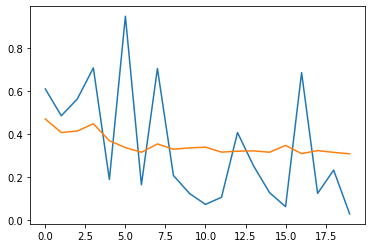

In [228]:
plt.plot(eps,t_loss)
plt.plot(eps,d_loss)
plt.show()

In [248]:
torch.save(net.state_dict(), 'sstcls_{}.dat'.format(ep))